In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import matplotlib as mpl
mpl.rcParams.update(
    {'font.family': 'sans-serif',
     'font.size': 16,
     'axes.labelsize': 16,
     'xtick.labelsize': 16,
     'ytick.labelsize': 16,
     'legend.fontsize': 16})

In [2]:
data = np.load("data_calibrated.npy")

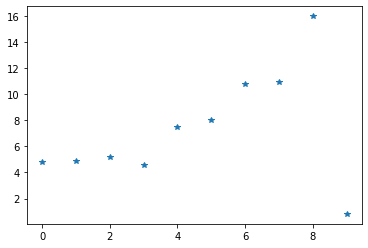

In [6]:
plt.plot(data[101], "*")

# Моделирование нашей констуркции с тавеком




In [5]:
path = "/home/zelenyy/data/satellite/wrapper/result_wrapper.hdf5"
path = "/home/zelenyy/data/satellite/double_wrapper/result_double_wrapper.hdf5"


In [13]:
result = []
with tables.open_file(path) as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "deposit")
        data =  table.read()
        wrapper_data = h5file.get_node(group, "wrapper_deposit").read()
        energy = table.attrs["values_macros_energy"]
        result.append((energy, data["event"].sum(axis=1).mean(), wrapper_data["event"].sum(axis=1).mean()))

In [14]:
for it in result:
    sum_ = it[1] + it[2]
    print(it[0], 100*it[1]/sum_, 100*it[2]/sum_)

1.0 0.0 100.0
2.0 0.0 100.0
3.0 31.08216895169593 68.91783104830408
4.0 65.38193905167935 34.618060948320654
5.0 78.00270890302602 21.99729109697399
6.0 84.61374311917974 15.386256880820262
7.0 88.60106459491816 11.398935405081852
8.0 91.12023808115688 8.879761918843103
9.0 92.79065949552253 7.2093405044774705
10.0 94.12980256696031 5.870197433039689
11.0 95.00142250064216 4.998577499357827
12.0 95.825429692232 4.174570307768002
13.0 96.40105282656398 3.598947173436021
14.0 96.84816888203726 3.151831117962733
15.0 97.2259832625841 2.7740167374158964
16.0 97.51749269338713 2.482507306612882
17.0 97.75016691125914 2.249833088740859
18.0 98.01273289868188 1.9872671013181078
19.0 98.20468521175873 1.7953147882412654
20.0 97.53516173331005 2.4648382666899598
21.0 93.08126492633315 6.918735073666852
22.0 95.20614488252396 4.793855117476045
23.0 96.14008537182472 3.8599146281752637
24.0 96.68837920253337 3.3116207974666256
25.0 97.04465242715754 2.9553475728424474
26.0 97.36650943923024 2.633

In [6]:

with tables.open_file(path) as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "deposit")
        energy = table.attrs["values_macros_energy"]
        if energy==71.0:
            data =  table.read()
            data = data["event"].sum(axis=0)/table.attrs["values_macros_number"]

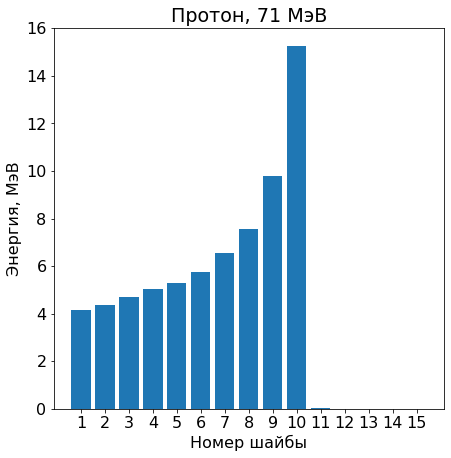

In [7]:
plt.figure(figsize=(7,7))
plt.title("Протон, 71 МэВ")
n = 15
plt.bar(list(map(str,range(1, n+1))), data[:n])
plt.xlabel("Номер шайбы")
plt.ylabel("Энергия, МэВ")
plt.savefig("proton_71_MeV.png")

In [10]:
with tables.open_file(path) as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "deposit")
        energy = table.attrs["values_macros_energy"]
        if energy==71.0:
            data =  table.read()

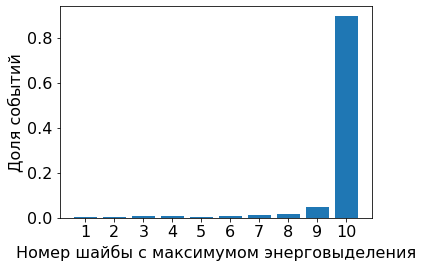

In [20]:
result = []
for it in data["event"]:
    result.append(it.argmax())
result = np.array(result)
value ,counts = np.unique(result, return_counts=True)
plt.bar(list(map(str, value+1)), counts/1000)
plt.ylabel("Доля событий")
plt.xlabel("Номер шайбы с максимумом энерговыделения")
plt.tight_layout()
plt.savefig("ratio.png")

# Автокалибровка Турчина

In [2]:
path = "/home/zelenyy/data/satellite/detail/result_detail.hdf5"

In [6]:
from scipy.stats import norm
# Спектр пучка по Гаврилову
class GavrilovBeam:

    energy_min = 70.6
    energy_max = 72.53
    mean = 71.62
    sigma = 0.227

    def get_weigth(self, e1,e2):
        p1 = norm.cdf(e1, loc=self.mean, scale=self.sigma)
        p2 = norm.cdf(e2, loc=self.mean, scale=self.sigma)
        return p2-p1



In [7]:
result = []

with tables.open_file(path) as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "deposit")
        energy = table.attrs["values_macros_energy"]
        if GavrilovBeam.energy_min<= energy < GavrilovBeam.energy_max:
            data =  table.read()
            data = data["event"].sum(axis=0)/table.attrs["values_macros_number"]
            result.append((energy, data))

result = sorted(result, key=lambda x: x[0])

In [15]:
signal = np.zeros(20, "d")
n = len(result) - 1
beam = GavrilovBeam()
sum_ = 0
for i in range(n):
    e1,e2 = result[i][0], result[i+1][0]
    weigth = beam.get_weigth(e1,e2)
    sum_ += weigth
    signal += result[i][1]*weigth
print(sum_)

0.9999374106688425


<BarContainer object of 15 artists>

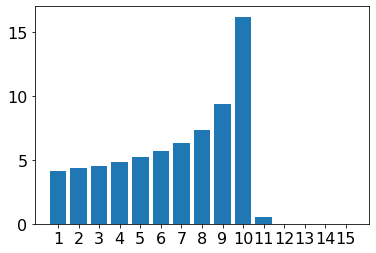

In [12]:
n = 15
plt.bar(list(map(str,range(1, n+1))), signal[:n])

In [16]:
data_timur = np.load("processed_data.npy")

In [18]:
data_sum = data_timur.mean(axis=1)

<BarContainer object of 10 artists>

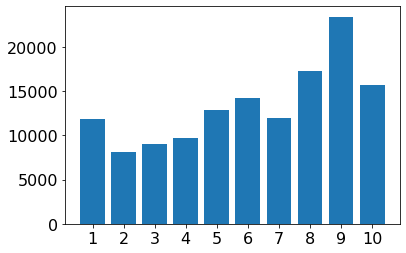

In [28]:
n = 10
plt.bar(list(map(str,range(1, n+1))), data_sum)

In [ ]:
alpha = data_sum/signal[:10]

<BarContainer object of 10 artists>

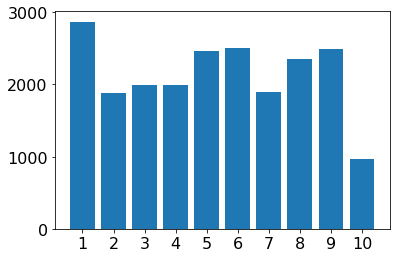

In [98]:
n = 10
plt.bar(list(map(str,range(1, n+1))), alpha)

In [24]:
calibrate = np.load("calibration_coeffs_puck10.npy")

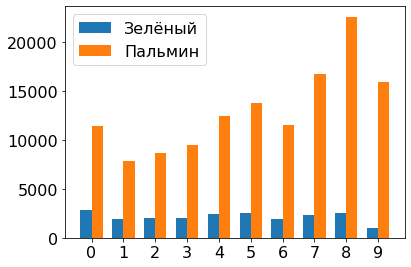

In [37]:
n = 10
x = np.arange(n)
width = 0.35
fig, ax = plt.subplots()
bar = ax.bar(x-width/2, alpha, width, label="Зелёный")
ax.bar(x+width/2, calibrate[:, 0], width,  label="Пальмин")
ax.set_xticks(x)
ax.set_xticklabels([str(int(it)) for it in x])
plt.legend();
plt.tight_layout()
plt.savefig("calibrate.png")

In [95]:
data_timur_calidrate = (data_timur.T/alpha).T
# data_timur_calidrate = (data_timur.T/calibrate[:,0]).T

@Vladimir Palmin @Egor Stadnichuk Я попробовал сделать следующую вещь:
Насимулировал данный с шагов в 0.05 МэВ в диапазоне от максимального до минимально значения

<BarContainer object of 10 artists>

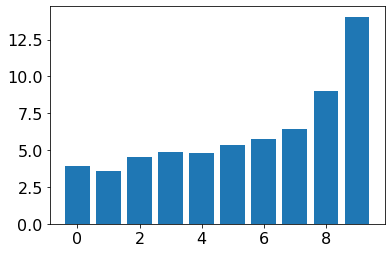

In [97]:
plt.bar(range(10), data_timur_calidrate[:, 100])

In [43]:
from scipy.interpolate import CubicSpline

In [62]:
energy = np.array([it[0] for it in result])

In [ ]:
mean_sim = np.stack((it[1][:10] for it in result))

In [50]:
kernels = [CubicSpline(energy, mean_sim[:, i]) for i in range(10)]

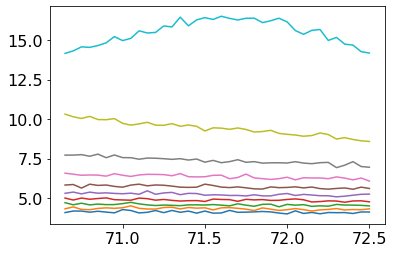

In [52]:
for k in kernels:
    plt.plot(energy, k(energy))

In [53]:
def kernel(x, y):
    i = int(y)
    return kernels[i](x)


In [59]:
from statreg.model import GaussErrorMatrixUnfolder
from statreg.basis import CubicSplines
from statreg.vector import PhiVec

In [55]:
bas =CubicSplines(energy)
omega = bas.omega(2)
model = GaussErrorMatrixUnfolder(omega)

In [ ]:
Kmn = bas.discretizeKernel(kernel, np.arange(10))

In [82]:
f = data_timur_calidrate.sum(axis=1)
sig = f**0.5

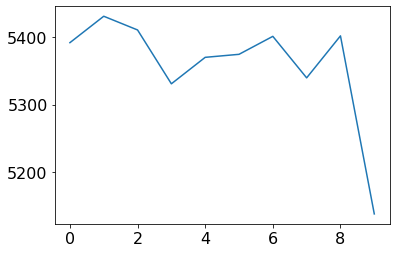

In [83]:
plt.plot(f)

In [84]:
KmnR = np.round(Kmn, 3)

In [88]:
beamRes = model.solve(KmnR, f, sig)

In [89]:
phi = PhiVec(beamRes.phi, bas, sig= beamRes.covariance)


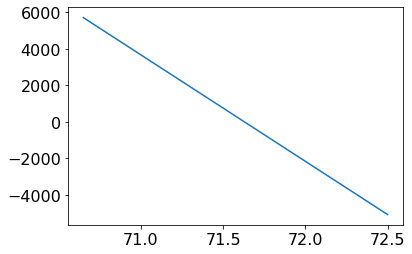

In [90]:
x = np.linspace(energy.min(),energy.max(), 200)
y = phi(x)
dy = phi.error(x)
plt.plot(x, y, label = 'StatReg')
plt.fill_between(x, y-dy,y+dy)


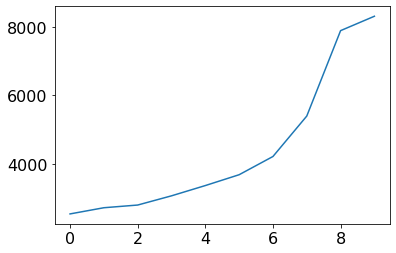

In [92]:
plt.plot(KmnR.dot(beamRes.phi))